In [1]:
import MCTS
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
from board_gen import *
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
stratL = ['loose_end','join','outer','middle']

n_runs=50
n_tasks=8
niter=np.zeros((n_runs,n_tasks+1))

In [3]:
si=3
for run_id in range(n_runs):
    taskL = [generate_board(tactic_name=stratL[si],n_extra_sticks=0,contiguous=True) for i in range(1)]
    taskL+=[generate_board(tactic_name=stratL[si],n_extra_sticks=2,contiguous=True) for i in range(n_tasks)]

    memory=[]
    for task_id,task in enumerate(taskL):
        hn=task.head_node
        t2=MCTS.MCTSTask(hn.obs,task.nsquares,hn.moves_remain)
        n_iters=MCTS.MCTS(t2,memory=memory,max_iters=100)
        MCTS.update_memory(t2,memory)
        niter[run_id,task_id]=n_iters

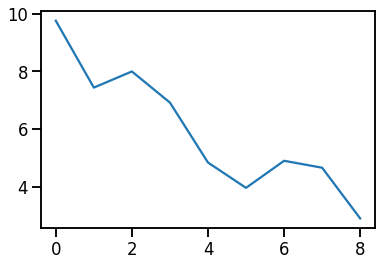

In [4]:
plt.plot(np.mean(niter,0))